<a href="https://colab.research.google.com/github/willismax/MediaSystem-Python-Course/blob/main/01.Intro-Python/%E8%B3%87%E6%96%99%E5%89%8D%E7%BD%AE%E8%99%95%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 資料前置處理

## 基本類型轉換

In [27]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
      {
      's':['Python','JavaScript','C++/C','Java','R','PHP'],
      'i':[1000,2000,3000,4000,5000,np.nan],
      'f':[55.66,77.88,952.7,88.1,np.nan,8.3],
      't':['5/10/2024','2021-5-10','2021/1/2','2021-3-4','2021/6/20',np.nan],
      'mix':[1,1,0,'+',0,1],
      'c':['A','B','A','B','A','B']
      }
    )

df.dtypes

s       object
i      float64
f      float64
t       object
mix     object
c       object
dtype: object

- 轉換時間類型
  - `pd.to_datetime(data, format='mixed)`
  - `format='ISO8601'` or `format='mixed'`.可自動識別時間類型

In [31]:
df['t'] = pd.to_datetime(df['t'], format='mixed') #format='ISO8601' or format='mixed'.
df['t']

0   2024-05-10
1   2021-05-10
2   2021-01-02
3   2021-03-04
4   2021-06-20
5          NaT
Name: t, dtype: datetime64[ns]

- 轉換數值類型
  - `pd.to_numeric(data, errors='coerce')`
  - `errors='coerce'`遇到非數值改為空值


In [32]:
df['mix'] = pd.to_numeric(df['mix'], errors='coerce')
df['mix']

0    1.0
1    1.0
2    0.0
3    NaN
4    0.0
5    1.0
Name: mix, dtype: float64

- 轉換分類類型其實很簡單
  - `pd.Categorical(data)`
`

In [16]:
df['c'] = pd.Categorical(df['c'])
df['c']

0    A
1    B
2    A
3    B
4    A
5    B
Name: c, dtype: category
Categories (2, object): ['A', 'B']

- 簡單的類型轉換
  - `df.astype()`
  - `errors`分raise、ignore

In [17]:
df['i'] = df['i'].astype(np.int64 , errors='ignore')
df['i']

0    1000.0
1    2000.0
2    3000.0
3    4000.0
4    5000.0
5       NaN
Name: i, dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   s       6 non-null      object        
 1   i       5 non-null      float64       
 2   f       5 non-null      float64       
 3   t       5 non-null      datetime64[ns]
 4   mix     5 non-null      float64       
 5   c       6 non-null      category      
dtypes: category(1), datetime64[ns](1), float64(3), object(1)
memory usage: 498.0+ bytes


## 資料清洗

### 缺漏值處理


```python
# isnull()當缺失值位置為True
dataframe = df.isnull()

# 刪除缺失的row
df_nan_row = df.dropna(axis=0)

# 刪除缺失的colum
df_nan_col = df.dropna(axis=1)

# 以平均值替代缺失值
df1_fill_lack2 = df1.fillna(df1.mean())

# drop_duplicates()直接對重複資料（行）進行刪除
df_isdup = df.duplicated()
```

### 查看資料



```python
df.nunique() #不同設定值個數
df['t'].unique() #不同設定值串列
df['t'].value_counts() #不同值出現次數
```



In [ ]:
df.nunique() #不同設定值個數

In [ ]:
df['t'].unique() #不同設定值串列

In [ ]:
df['t'].value_counts() #不同值出現次數

In [43]:
df.isnull()     #是否空值
# df.isnull().any()  #是否含有任意空值
# df.isnull().all()  #是否全部空值
# df.isnull().sum()  #空值個數

,s,i,f,t,mix,c
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,True,False,False,False
5,False,True,False,True,False,False


### 異常值處理

- 處理方式1: 捨棄

In [44]:
df.dropna(axis=1, how='all')
# df.dropna(axis=0, how='any')

,s,i,f,t,mix,c
0,Python,1000.0,55.66,2024-05-10,1.0,A
1,JavaScript,2000.0,77.88,2021-05-10,1.0,B
2,C++/C,3000.0,952.70,2021-01-02,0.0,A
3,Java,4000.0,88.10,2021-03-04,NaN,B
4,R,5000.0,NaN,2021-06-20,0.0,A
5,PHP,NaN,8.30,NaT,1.0,B


- 缺漏處理方法2: 填值
    - 數值型: 預設值、平均值、加權平均、中位數、眾數等
    - 分類型: 可用占比較多的分類
    - 或用預測的方法填值

In [ ]:
df['i'].fillna(df['i'].mean())

0    1000.0
1    2000.0
2    3000.0
3    4000.0
4    5000.0
5    3000.0
Name: i, dtype: float64

In [ ]:
# i=5原為空值
df['t'].fillna(method='ffill', limit=2) #ffill以前值填充，limit在前面也為空值時，最多可拿到前2個的值

0   2021-05-10
1   2021-05-10
2   2021-01-02
3   2021-03-04
4   2021-06-20
5   2021-06-20
Name: t, dtype: datetime64[ns]

- 缺漏處理方法3: 標記缺漏
  - 舉例將文字類型標記為"未知"，數值類型標記為'-1'等，以因應無法預測缺漏值補值的狀況

In [ ]:
df['i'].fillna(-1)

0    1000.0
1    2000.0
2    3000.0
3    4000.0
4    5000.0
5      -1.0
Name: i, dtype: float64

- 缺漏處理方法4: 不處理

簡單的轉換用`df.apply(lambda)`實現

In [ ]:
df['mix'] = [1,1,0,'+',0,1]
df['mix']

0    1
1    1
2    0
3    +
4    0
5    1
Name: mix, dtype: object

In [ ]:
df['mix'].apply(lambda x: 1 if x=='+' else x)

0    1
1    1
2    0
3    1
4    0
5    1
Name: mix, dtype: int64

- 數值的離群值可靠繪圖觀察
- 至於何為離群需要個別設計，常見以上四分位數與下四分位數之差(IQR=Q3-Q1，即box)，計算最小觀測值min=Q1-1.5*IQR，最大觀測值max=Q3+1.5*IQR，超出者視為離群值。

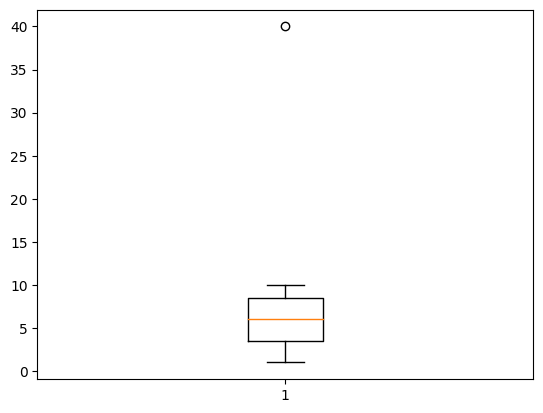

In [45]:
import matplotlib.pyplot as plt

arr = [1,2,3,7,8,9,4,10,40,5,6]
plt.boxplot(arr)
plt.show()

In [47]:
ds = pd.Series(arr)
ds.describe()
Q1,Q3 = 3.5, 8.5
IQR = Q3 - Q1
min = Q1-1.5*IQR
max = Q3+1.5*IQR
print(IQR, min , max)

(ds<min) | (ds>max)

5.0 -4.0 16.0


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8      True
9     False
10    False
dtype: bool

{'whiskers': [<matplotlib.lines.Line2D at 0x7e9095f99570>,
 'caps': [<matplotlib.lines.Line2D at 0x7e9095f99ff0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e9095f981c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e9095f9be20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e9095f9b910>],
 'means': []}

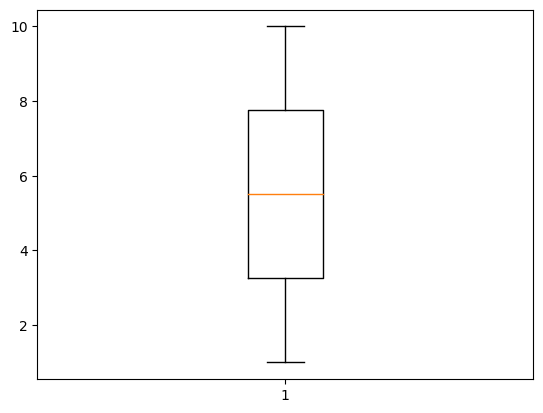

In [48]:
plt.boxplot(ds[(ds>min) & (ds <max)])

### 重複值處理

In [ ]:
df['t']

0   2021-05-10
1   2021-05-10
2   2021-01-02
3   2021-03-04
4   2021-06-20
5          NaT
Name: t, dtype: datetime64[ns]

In [ ]:
df['t'].drop_duplicates(keep='last')

1   2021-05-10
2   2021-01-02
3   2021-03-04
4   2021-06-20
5          NaT
Name: t, dtype: datetime64[ns]

## 特徵工程


### 正規化(Normalization)

#### 數值型特徵轉換

In [49]:
import pandas as pd

data = pd.DataFrame(
   {
    'height':[1.68,1.73,1.83],
    'weight':[60,70,90]

   }
   )
data = pd.DataFrame(data)
data['BMI'] = data['weight'] / data['height']**2
data

,height,weight,BMI
0,1.68,60,21.258503
1,1.73,70,23.388687
2,1.83,90,26.874496


- 透過判斷邊界將連續特徵轉換成離散特徵


In [50]:
data['overweight'] = data['BMI'] > 25
data

,height,weight,BMI,overweight
0,1.68,60,21.258503,False
1,1.73,70,23.388687,False
2,1.83,90,26.874496,True


- 透過字典(dict)映射方式(map)轉換特徵

In [51]:
data['overweight'] = data['overweight'].map({True:'Yes',False:'No'})
data

,height,weight,BMI,overweight
0,1.68,60,21.258503,No
1,1.73,70,23.388687,No
2,1.83,90,26.874496,Yes


#### 分類型特徵轉換Categorical Features

- 譬如「第一組/第二組/第三組」、「1/2/3」的分組，直接數值帶入模型會產生不合理的距離
- 採用「 One-hot encoding」編碼
  - `pd.factorize()`可轉為0-N類別編碼
  - `pd.get_dummies()`可轉為One-hot encoding

In [52]:
import pandas as pd

data = pd.DataFrame( {'s':['第一組','第二組','第三組']} )

- 0-N類別編碼

In [53]:
pd.factorize(data['s'])

(array([0, 1, 2]), Index(['第一組', '第二組', '第三組'], dtype='object'))

In [54]:
from sklearn import preprocessing

preprocessing.LabelEncoder().fit_transform(data['s'].values)

array([0, 2, 1])

- One-hot encoding

In [55]:
pd.get_dummies(data['s'])

,第一組,第三組,第二組
0,True,False,False
1,False,False,True
2,False,True,False


In [56]:
data['num'] = pd.factorize(data['s'])[0]
df = pd.get_dummies(data['s'], prefix='組別') #轉為One-hot encoding，並加上前綴詞
new_df = pd.concat([data,df], axis=1)
new_df

,s,num,組別_第一組,組別_第三組,組別_第二組
0,第一組,0,True,False,False
1,第二組,1,False,False,True
2,第三組,2,False,True,False


#### 文字特徵Text Features轉換

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

corpus = [
          'This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?'
      ]

vec = CountVectorizer()
X = vec.fit_transform(corpus)

pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


- 文字頻率（term frequency-inverse document frequency,TF-IDF），可以通過衡量它們在文檔中出現的頻率來對字數進行加權。

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
          'This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?'
      ]

vec = TfidfVectorizer()
X = vec.fit_transform(corpus)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


### 標準化(standardization)
- 比較不同特徵的尺度不同(如身高、體重)，對模型的收斂會有影響
- 常見的資料標準化方式：
  - Max-Min
  - Z-Score
  - MaxAbs
  - RobustScaler

##### Max-Min

In [59]:
import pandas as pd

data = pd.DataFrame(
   {
    'height':[1.68,1.90,1.83],
    'weight':[60,70,90]

   }
   )
data = pd.DataFrame(data)
data

,height,weight
0,1.68,60
1,1.90,70
2,1.83,90


In [60]:
from sklearn import preprocessing
#建立MinMaxScaler物件
minmax = preprocessing.MinMaxScaler()
# 資料標準化
data_minmax = minmax.fit_transform(data)
data_minmax

array([[0.        , 0.        ],
       [1.        , 0.33333333],
       [0.68181818, 1.        ]])

##### Z-Score
  - 均值（mean）和標準差（standard deviation）進行資料的標準化，適用於資料的最大值和最小值未知的情況，或有超出取值範圍的離群資料的情況。
  - 公式：`新資料=（原始資料-均值）/標準差`

In [61]:
from sklearn import preprocessing
#建立StandardScaler物件
zscore = preprocessing.StandardScaler()
# 資料標準化
data_zs = zscore.fit_transform(data)
data_zs

array([[-1.34390052, -1.06904497],
       [ 1.05332743, -0.26726124],
       [ 0.29057308,  1.33630621]])

##### MaxAbs
- 根據最大值的絕對值進行標準化
- 公式：`新資料 = 原始資料 / |原始資料的最大值|`，其中max為x鎖在列的最大值，資料區間為[-1, 1]，因此適用於稀疏矩陣。

In [62]:
from sklearn import preprocessing
#建立MinMaxScaler物件
maxabs = preprocessing.MaxAbsScaler()
# 資料標準化
data_maxabs = maxabs.fit_transform(data)
data_maxabs

array([[0.88421053, 0.66666667],
       [1.        , 0.77777778],
       [0.96315789, 1.        ]])

##### RobustScaler
- 資料集中存在離群點，利用RobustScaler針對離群點做標準化處理，該方法對資料中心化的資料的縮放更強的引數控制能力

In [63]:
from sklearn import preprocessing
#建立RobustScaler物件
robust = preprocessing.RobustScaler()
# 資料標準化
data_rob = robust.fit_transform(data)
data_rob

array([[-1.36363636, -0.66666667],
       [ 0.63636364,  0.        ],
       [ 0.        ,  1.33333333]])